# 沃德階層分群法(Ward Hierarchical Clustering)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm

# MNIST Dataset

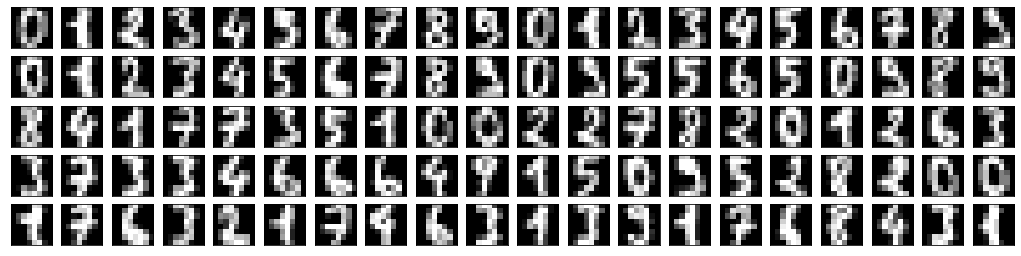

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Ward Hierarchical Clustering

In [4]:
from scipy.spatial.distance import cdist,pdist
from scipy.cluster import hierarchy
N,M=X.shape
def ward_tree(z,index,num):
    index=int(index)
    if(index>N-1):
        index-=N
    else:
        return index
    if(num==0):
        return index
    else:
        left_index=ward_tree(z,z[index,0],num-1)
        right_index=ward_tree(z,z[index,1],num-1)
        return [left_index,right_index]
def flatten(index,table):
    if(type(index)!=type(0)):
        for idx in index:
            flatten(idx,table)
    else:
        table.append(index)
    return table
x_condensed=pdist(X)
z=hierarchy.ward(x_condensed)
table=[N-2]
for i in range(10):
    table.append(int(z[table[0],0]-N))
    table.append(int(z[table[0],1]-N))
    del table[0]
    tensor=list(np.argsort(z[table,3])[::-1])
    table=np.array(table)
    table=list(table[tensor])
print(table)

[1783, 1784, 1781, 1779, 1786, 1782, 1760, 1770, 1776, 1771, 1778]


# Plot

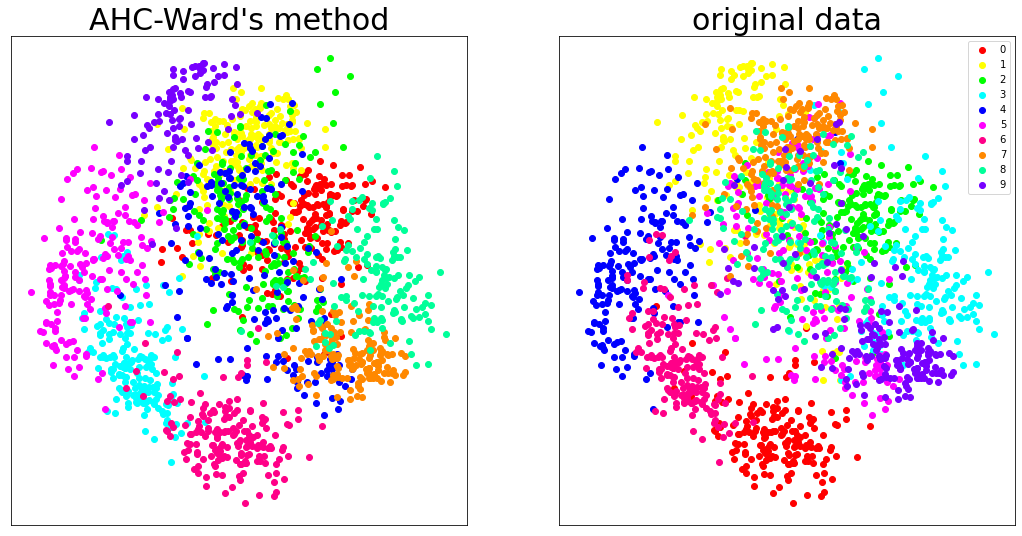

In [5]:
X_embedded=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,9)
fig , ax = plt.subplots()
plt.subplot(1, 2, 1)
for i in range(0,10):
    idx=ward_tree(z,table[i]+N,N)
    tab=flatten(idx,[])
    plt.scatter(X_embedded[tab,0],X_embedded[tab,1],c=color[i])
plt.title("AHC-Ward's method",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
for i in range(0,10):
    plt.scatter(X_embedded[(y==i),0],X_embedded[(y==i),1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()